In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Leaves Data

/content/drive/MyDrive/Leaves Data


In [ ]:
from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions
train_datagen = ImageDataGenerator(zoom_range = 0.5, shear_range = 0.3, horizontal_flip = True)
val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)


In [ ]:
train=train_datagen.flow_from_directory(directory="/content/drive/MyDrive/Leaves Data/train",target_size=(256,256),batch_size=32)
val=val_datagen.flow_from_directory(directory="/content/drive/MyDrive/Leaves Data/valid",target_size=(256,256),batch_size=32)



Found 1282 images belonging to 8 classes.
Found 978 images belonging to 8 classes.


In [ ]:
t_img,label=train.next()

In [ ]:
t_img.shape

(32, 256, 256, 3)

In [ ]:
def plotImage(img_arr,label):
  for im, l in zip(img_arr, label):
    plt.figure(figsize = (5, 5))
    plt.imshow(im)
    plt.show()

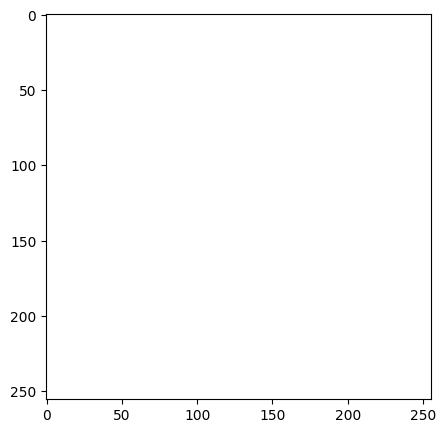

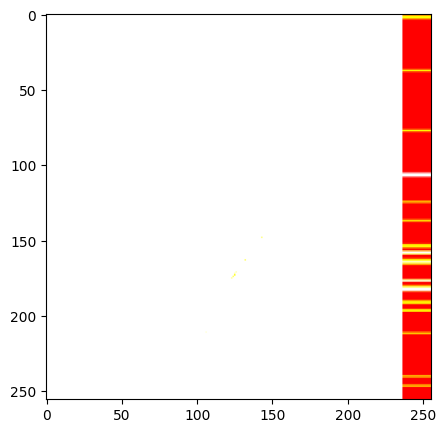

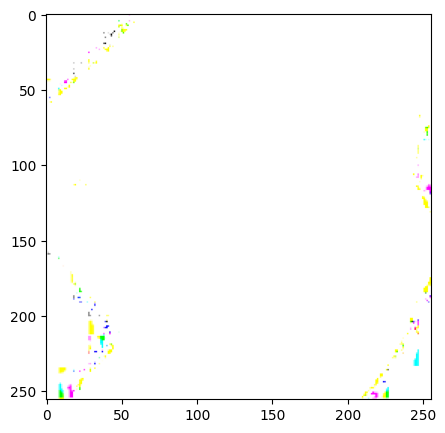

In [ ]:
plotImage(t_img[:3],label[:3])

In [ ]:
!pip install keras
from keras.layers import Dense,Flatten
from keras.models import Model
from tensorflow.keras.applications import VGG19 



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

base_model = VGG19(input_shape = (256, 256, 3), include_top = False)


80134624/80134624 [==============================] - 3s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False


In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
X=Flatten()(base_model.output)
X=Dense(units=8,activation='softmax')(X)



In [ ]:
model=Model(base_model.input,X)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
model.compile(optimizer='adam',loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1)
mc=ModelCheckpoint(filepath="/content/best_model.h5",
                   monitor='val_accuracy',
                   patience=3,
                   verbose=1,
                   save_best_only=True)
cb=[es,mc]

In [ ]:
his = model.fit_generator(train,
                        steps_per_epoch=16,
                        epochs = 10,
                        verbose=1,
                        callbacks=cb,
                        validation_data=val,
                        validation_steps=16)

<ipython-input-21-84f87942153a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train,


Epoch 1/10
16/16 [==============================] - ETA: 0s - loss: 1.3685 - accuracy: 0.9375 
Epoch 1: val_accuracy did not improve from 0.86523
16/16 [==============================] - 1135s 72s/step - loss: 1.3685 - accuracy: 0.9375 - val_loss: 3.5582 - val_accuracy: 0.8379
Epoch 2/10
16/16 [==============================] - ETA: 0s - loss: 1.6444 - accuracy: 0.9414 
Epoch 2: val_accuracy did not improve from 0.86523
16/16 [==============================] - 1104s 71s/step - loss: 1.6444 - accuracy: 0.9414 - val_loss: 3.2552 - val_accuracy: 0.8301
Epoch 3/10
16/16 [==============================] - ETA: 0s - loss: 1.5785 - accuracy: 0.9395 
Epoch 3: val_accuracy did not improve from 0.86523
16/16 [==============================] - 1102s 71s/step - loss: 1.5785 - accuracy: 0.9395 - val_loss: 2.8480 - val_accuracy: 0.8535
Epoch 4/10
16/16 [==============================] - ETA: 0s - loss: 1.3881 - accuracy: 0.9473 
Epoch 4: val_accuracy did not improve from 0.86523
16/16 [=============

In [23]:
h = his.history
h.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

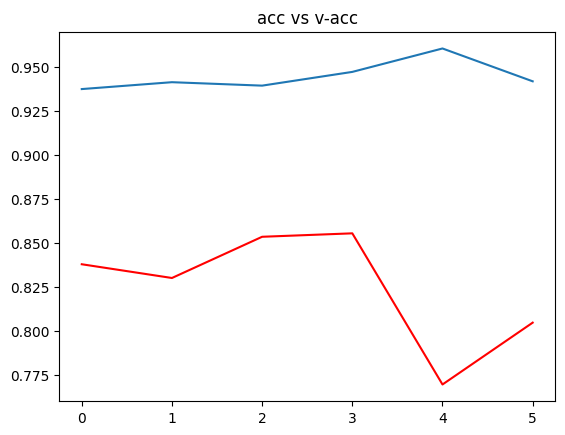

In [24]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()


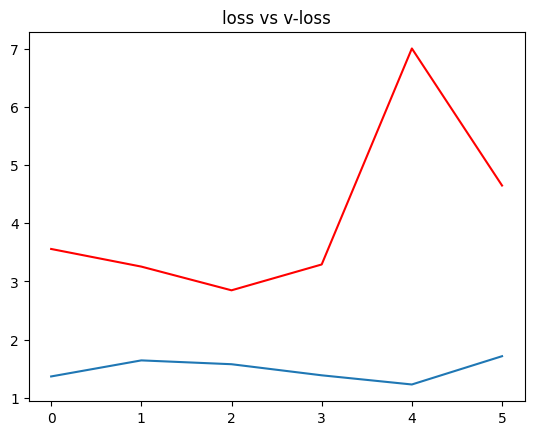

In [29]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("loss vs v-loss")
plt.show()


In [30]:
#load best model
from keras.models import load_model
model = load_model("/content/best_model.h5")



In [33]:
acc = model.evaluate(val)[1]
print(f"The accuracy of your model is {acc*100} %")



31/31 [==============================] - 1021s 33s/step - loss: 3.1974 - accuracy: 0.8425
The accuracy of your model is 84.25357937812805 %


In [38]:
def prediction(path):
  img = load_img(path, target_size = (256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im, axis = 0)
  pred = np.argmax(model.predict(img))
  print(pred)


In [41]:
path = "/content/drive/MyDrive/Leaves Data/test/test/AppleCedarRust1.JPG"
prediction(path)



1/1 [==============================] - 1s 911ms/step
2


In [42]:
ref = dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))


In [48]:
def prediction(path):
  img = load_img(path, target_size = (256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im, axis = 0)
  pred = np.argmax(model.predict(img))
  print("the image belongs to", ref[pred])

path = "/content/drive/MyDrive/Leaves Data/test/test/AppleScab1.JPG"
prediction(path)


1/1 [==============================] - 1s 891ms/step
the image belongs to Apple_Apple_scab
